In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv('mall_customers_data.csv')
df.head()

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)
0           1    Male   19             15                      39
1           2    Male   21             15                      81
2           3  Female   20             16                       6
3           4  Female   23             16                      77
4           5  Female   31             17                      40

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income             0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income             False
Spending Score (1-100)    False
dtype: bool

In [7]:
df.nunique()

CustomerID                200
Gender                      2
Age                        50
Annual_Income              67
Spending Score (1-100)     82
dtype: int64

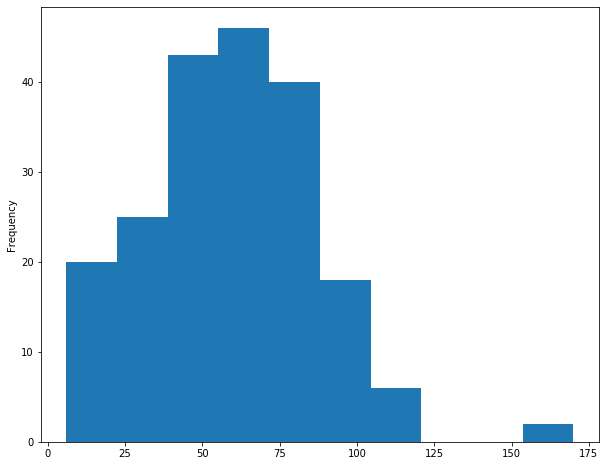

In [8]:
df['Annual_Income'].plot.hist(bins=10,figsize=(10,8))

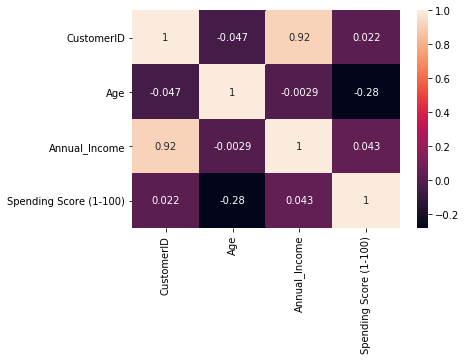

In [9]:
import seaborn as sn
sn.heatmap(df.corr(),annot=True)

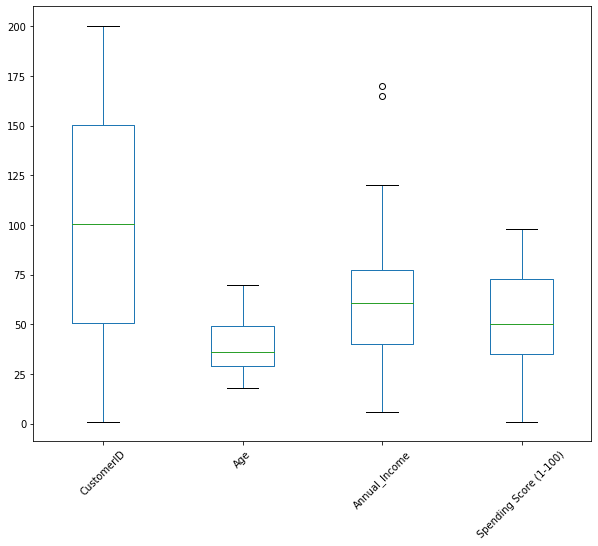

In [10]:
df.boxplot(grid=False,figsize=(10,8),rot=45)

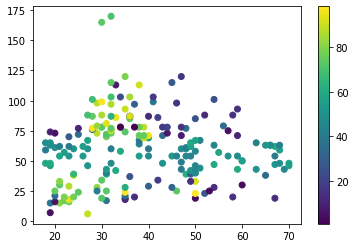

In [11]:
plt.scatter(x=df['Age'],y=df['Annual_Income'],c=df['Spending Score (1-100)'],cmap='viridis')
plt.colorbar()

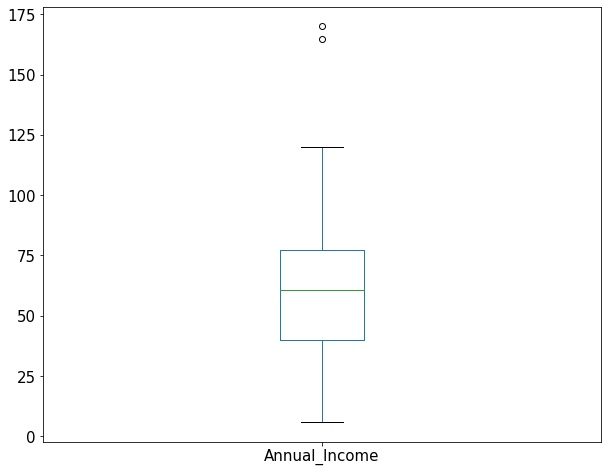

In [12]:
boxplot = df.boxplot(grid=False, fontsize=15,column=['Annual_Income'], figsize=(10, 8));

In [13]:
df[df['Annual_Income']>125]

CustomerID Gender  Age  Annual_Income  Spending Score (1-100)
198         199   Male   32            170                      70
199         200   Male   30            165                      73

In [14]:
gen = df.groupby(by=['Gender'])

In [15]:
gen.get_group('Male')

CustomerID Gender  Age  Annual_Income  Spending Score (1-100)
0             1   Male   19             15                      39
1             2   Male   21             15                      81
8             9   Male   50             19                       3
10           11   Male   67             19                      14
14           15   Male   37             20                      14
..          ...    ...  ...            ...                     ...
187         188   Male   28            101                      68
192         193   Male   33            113                       8
197         198   Male   32            115                      74
198         199   Male   32            170                      70
199         200   Male   30            165                      73

[88 rows x 5 columns]

In [17]:
q1 = df['Annual_Income'].quantile(0.25)
q1

40.0

In [18]:
q3 = df['Annual_Income'].quantile(0.75)
q3

77.25

In [19]:
IQR = q3 - q1

In [20]:
df['Annual_Income_Outlier'] = False

In [21]:
df.head()

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)  \
0           1    Male   19             15                      39   
1           2    Male   21             15                      81   
2           3  Female   20             16                       6   
3           4  Female   23             16                      77   
4           5  Female   31             17                      40   

   Annual_Income_Outlier  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [30]:
x = q1 + 1.5 * IQR
x

95.875

In [63]:
df['Annual_Income_Outlier'] = [True if(i>x) else False for i in df['Annual_Income']]
df.head()

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)  \
0           1    Male   19             15                      39   
1           2    Male   21             15                      81   
2           3  Female   20             16                       6   
3           4  Female   23             16                      77   
4           5  Female   31             17                      40   

   Annual_Income_Outlier  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [64]:
df[df['Annual_Income']>x]

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)  \
180         181  Female   37             97                      32   
181         182  Female   32             97                      86   
182         183    Male   46             98                      15   
183         184  Female   29             98                      88   
184         185  Female   41             99                      39   
185         186    Male   30             99                      97   
186         187  Female   54            101                      24   
187         188    Male   28            101                      68   
188         189  Female   41            103                      17   
189         190  Female   36            103                      85   
190         191  Female   34            103                      23   
191         192  Female   32            103                      69   
192         193    Male   33            113                       8   
193         194  Female   38            113                      91   
194         195  Female   47            120                      16   
195         196  Female   35            120                      79   
196         197  Female   45            115                      28   
197         198    Male   32            115                      74   
198         199    Male   32            170                      70   
199         200    Male   30            165                      73   

     Annual_Income_Outlier  
180                   True  
181                   True  
182                   True  
183                   True  
184                   True  
185                   True  
186                   True  
187                   True  
188                   True  
189                   True  
190                   True  
191                   True  
192                   True  
193                   True  
194                   True  
195                   True  
196                   True  
197                   True  
198                   True  
199                   True

In [65]:
df['Annual_Income_Outlier'].sum()

20

In [66]:
non_outlier = df[df['Annual_Income_Outlier']==False]

In [67]:
non_outlier.head()

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)  \
0           1    Male   19             15                      39   
1           2    Male   21             15                      81   
2           3  Female   20             16                       6   
3           4  Female   23             16                      77   
4           5  Female   31             17                      40   

   Annual_Income_Outlier  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [68]:
mean = non_outlier['Annual_Income'].mean()
mean

54.05555555555556

In [71]:
df['Annual_Income'] = [mean if i>x else i for i in df['Annual_Income']]

In [72]:
df.head()

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)  \
0           1    Male   19           15.0                      39   
1           2    Male   21           15.0                      81   
2           3  Female   20           16.0                       6   
3           4  Female   23           16.0                      77   
4           5  Female   31           17.0                      40   

   Annual_Income_Outlier  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [74]:
df[df['Annual_Income']>x]

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual_Income, Spending Score (1-100), Annual_Income_Outlier]
Index: []

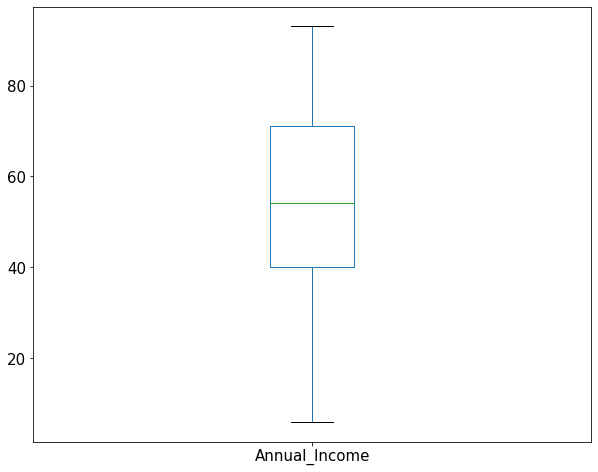

In [75]:
df.boxplot(grid=False, fontsize=15,column=['Annual_Income'], figsize=(10, 8))